<p style="background-color:#4682B4; font-family: 'Arial', sans-serif; color:white; font-size: 150%; text-align:center; padding: 20px; border-radius: 10px; padding:10px);"> 🔍 Detecting Fake Job Offers: Can You Tell the Difference? 💼 </p>


<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;">
    I.Introduction 📖
</p></b>


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">1.1 Problem Statement/Objectives</b></p>

<p style="font-family: 'Merriweather'; color:black; font-size: 110%; text-align:left;">
    <b>Online job platforms</b> have become vital for job seekers and recruiters, 
    but they face a growing issue: <span style="color:#6A5ACD; font-weight:bold;">fraudulent job postings</span>. 
    These fake offers exploit users' trust, risking their personal and financial information. 
    Detecting such fraud is challenging due to its evolving nature and the lack of tools available to users. 
    This project addresses the problem by leveraging <b style="color:#6A5ACD;">machine learning</b> techniques 
    to develop a predictive model capable of identifying fraudulent job postings. 
    By analyzing patterns in job data, the model aims to provide a reliable solution that enhances the 
    security and trustworthiness of online job platforms, ensuring safer experiences for job seekers. 
</p>


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">1.2  Importing libraries</b></p>

<p style="font-family:'Merriweather'; color:black; font-size: 110%; text-align:left;">In this phase, we begin by importing the necessary libraries
    that will enable us to analyze and process the data effectively. </p>

In [76]:
# pandas - A powerful library for data manipulation and analysis
import pandas as pd  

# numpy - A library for numerical computing, supporting arrays, matrices, and mathematical operations
import numpy as np  

# matplotlib - A library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt  

# seaborn - A Python data visualization library based on matplotlib, for statistical graphics
import seaborn as sns  

# string - A Python module with common string manipulation tools
import string  

# re - A module for working with regular expressions, useful for pattern matching in strings
import re  

# nltk - A library for natural language processing tasks like tokenization and stemming
from nltk.corpus import stopwords  # Provides a list of common stopwords for text preprocessing
from nltk.stem import WordNetLemmatizer  # Used for lemmatizing words to their base forms

# sklearn - A machine learning library with tools for preprocessing, classification, and evaluation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Tools for converting text into numerical features
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels into numeric format
from sklearn.tree import DecisionTreeClassifier  # Decision tree model for classification tasks
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes model for text classification
from sklearn.linear_model import LogisticRegression  # Logistic regression model for binary classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  # Ensemble learning models
from sklearn.svm import SVC  # Support Vector Classifier for binary/multiclass classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate  # Tools for data splitting and hyperparameter optimization
from sklearn.metrics import (
    accuracy_score,  # Calculates the ratio of correctly predicted instances
    precision_score,  # Measures precision (true positives / predicted positives)
    recall_score,  # Measures recall (true positives / actual positives)
    f1_score,  # Harmonic mean of precision and recall
    classification_report,  # Generates a detailed performance report
    roc_curve, auc,  # Tools for computing ROC curve and AUC
    confusion_matrix, ConfusionMatrixDisplay  # Tools for creating and visualizing confusion matrices
)

# imbalanced-learn - Tools for handling imbalanced datasets
from imblearn.over_sampling import SMOTE, RandomOverSampler  # Methods for oversampling minority classes
from imblearn.under_sampling import RandomUnderSampler  # Method for undersampling majority classes

# optuna - A library for hyperparameter optimization
import optuna  

# xgboost - A gradient boosting framework optimized for speed and accuracy
import xgboost as xgb  

# lightgbm - A fast, gradient boosting framework, especially suited for large datasets
from lightgbm import LGBMClassifier  

# joblib - A library for serializing and deserializing Python objects, used to save models
import joblib  

# IPython - Provides rich display functionality in Jupyter Notebooks
from IPython.display import display, HTML  # Tools for displaying HTML content and DataFrames

# category_encoders - Encodes categorical variables for machine learning models
import category_encoders as ce  


In [77]:
warnings.filterwarnings("ignore")


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">1.3  Dataset Overview</b></p>

<p style="font-family:Merriweather; color:black; font-size:100%; text-align:left;">
    The data used for the project can be found on 
    <a href="https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction" style="color:#FFD700; text-decoration:none;">Kaggle</a>, 
    and as said in the introduction, the data we chose is about job interviews that are fraudulent or not. 
    It was necessary to make a lot of adaptations and optimization to the dataset due to the large number of lines in the database, 
    and alter the data that are not relevant for our analysis.
</p>


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:#5F9EA0; font-size:100%; text-align:left;">📊 Loading the Dataset 📁</b></p>


In [78]:
# Load dataset into a DataFram
df = pd.read_csv('fake_job_postings.csv')

# Display the first 5 rows of the dataset to get a quick overview of the structure and content.
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<br><b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:#5F9EA0; font-size:110%; text-align:left;"> Learning About the Dataset 🔍</p></b>

In [79]:
# Displaying the dimensions of the DataFrame
df.shape


(17880, 18)

><p style="font-family:Merriweather; color:black; font-size:115%; text-align:left;">
This dataset contains 17,880 job postings, providing comprehensive details across 18 attributes.</p>

In [80]:
# Display information about the DataFrame including the number of entries, column names, 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

><p style="font-family:Merriweather; color:black; font-size:110%; text-align:left">The dataset provides detailed information on job postings, including attributes like job titles, locations, salary ranges, and company profiles, with some missing values in certain columns

In [81]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">Generate descriptive statistics for the numerical columns in the dataset, including measures like mean, standard deviation, min, max, and percentiles.This provides a summary of the distribution of numerical features and helps identify potential outliers.

In [82]:
# Generate descriptive statistics for the categorical columns (object type) in the dataset.
# This includes the count of non-null values, the number of unique values, the most frequent value (mode),
# and the frequency of the mode. It helps us understand the distribution and common values in categorical data.
df.describe(include='object')


,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15184,10668,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11967,6204,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">Generate descriptive statistics for the categorical columns (object type) in the dataset.This includes the count of non-null values, the number of unique values, the most frequent value (mode),
and the frequency of the mode. It helps us understand the distribution and common values in categorical data.

In [83]:
# Check the data types of each column.
df.dtypes


job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

><p style="font-family:Merriweather ; color:black; font-size:110%; text-align:left;">The dataset provides detailed information on job postings, including attributes like job titles, locations, salary ranges, and company profiles.

In [84]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Display the number of categorical columns
print(f"Number of categorical columns: {len(categorical_cols)}")
print("Categorical columns:", list(categorical_cols))


Number of categorical columns: 13
Categorical columns: ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [85]:
# Identify the numeric columns
numerico_cols = df.select_dtypes(include=['number']).columns

# Display the number of categorical columns
print(f"Number of numeric columns: {len(numerico_cols)}")
# Display the numeric columns
print(f"Numeric columns: {list(numerico_cols)}")


Number of numeric columns: 5
Numeric columns: ['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [86]:
# Identify binary and non-binary columns
binary_cols = []
multi_value_cols = []

for col in numerico_cols:
    # Check the number of unique values in each column
    unique_values = df[col].nunique()
    
    if unique_values == 2:
        binary_cols.append(col)  # If 2 unique values, it's a binary column
    else:
        multi_value_cols.append(col)  # Otherwise, it has multiple unique values

# Display the results
print(f"Binary Columns: {binary_cols}")
print(f" Multi-value Columns: {multi_value_cols}")


Binary Columns: ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
 Multi-value Columns: ['job_id']


In [87]:
# Check the distribution of the target variable (fraudulent) to see if the data is imbalanced.
df['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

><p style="font-family:Merriweather ; color:black; font-size:110%; text-align:left;">The fraudulent column contains two unique values: `0` and `1`. The majority of job postings (17,014) are labeled as non-fraudulent (`0`), while a smaller number (866) are marked as fraudulent (`1`).

In [88]:
# Create a contingency table for the binary columns and the target column
table = pd.crosstab(
    index=[df['has_company_logo'], df['has_questions']],  # Binary columns
    columns=df['fraudulent'],  # Target column
    margins=True,  # Add totals
    margins_name='Total'  # Name for the total row/column
)

print(table)


fraudulent                          0    1  Total
has_company_logo has_questions                   
0                0               2214  490   2704
                 1                863   93    956
1                0               6258  126   6384
                 1               7679  157   7836
Total                           17014  866  17880


In [121]:
fraud_rates = {}
for (logo, questions) in table.index[:-1]:  
    total = table.loc[(logo, questions), 'Total']
    fraud = table.loc[(logo, questions), 1] 
    fraud_rate = fraud / total
    fraud_rates[(logo, questions)] = fraud_rate


for comb, rate in fraud_rates.items():
    print(f"Taux de fraude for has_company_logo = {comb[0]} and has_questions = {comb[1]} : {rate:.4f}")

Taux de fraude for has_company_logo = 0 and has_questions = 0 : 0.1812
Taux de fraude for has_company_logo = 0 and has_questions = 1 : 0.0973
Taux de fraude for has_company_logo = 1 and has_questions = 0 : 0.0197
Taux de fraude for has_company_logo = 1 and has_questions = 1 : 0.0200


<br><b><p style="font-family:'times' ; color:black; font-size:110%; text-align:left;">"Creating this contingency table allows for examining the relationship between the binary attributes has_company_logo and has_questions with the target variable fraudulent. By analyzing these variables together, patterns or combinations of attributes, such as the presence of a company logo or job-related questions, can be assessed for their association with the likelihood of a job posting being fraudulent. This table also helps identify significant trends or correlations, which are valuable for feature selection or further analysis in building a model to predict fraudulent job postings."


<b>
<p style="font-family:Bebas Neue; color:#4682B4; font-size:100%; text-align:left;">
  Having gained an understanding of the dataset and its key attributes, we now proceed with the Exploratory Data Analysis (EDA) to uncover patterns, trends, and potential insights.
</p>


<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;">
    II. Exploratory Data Analysis (EDA) 📊
</p></b>


 <p style="font-family:'Merriweather'; color:black; font-size:110%; text-align:left;">Now that we have a clear understanding of the dataset, we will move on to the Exploratory Data Analysis (EDA) to identify trends, patterns, and potential relationships within the data.

<br><b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">2.1 Data Cleaning</b></p>

<p style="font-family:'Merriweather'; color:black; font-size:110%; text-align:left;">In the data cleaning process, the strategy involves first identifying and removing irrelevant columns that have low correlation with the target variable or provide no meaningful insights. Then, missing values are addressed by replacing them with appropriate placeholders or imputed values, ensuring the dataset is complete and ready for further analysis.

<img src="ImageS/d.png" style="display: block;">


<p style="font-family:'Merriweather'; color:black; font-size:110%; text-align:left;">Steps to handle missing values, duplicates, and other inconsistencies.  


In [90]:
# Check for missing values in the dataset to identify columns that need attention.
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

><p style="font-family:'Merriweather' ; color:#4682B4; font-size:110%; text-align:left;">This output shows the count of missing (null) values for each column in the dataset. Some columns, such as 'department', 'salary_range', and 'company_profile', have a significant number of missing entries, while others like 'job_id', 'telecommuting', and 'fraudulent' have no missing data.

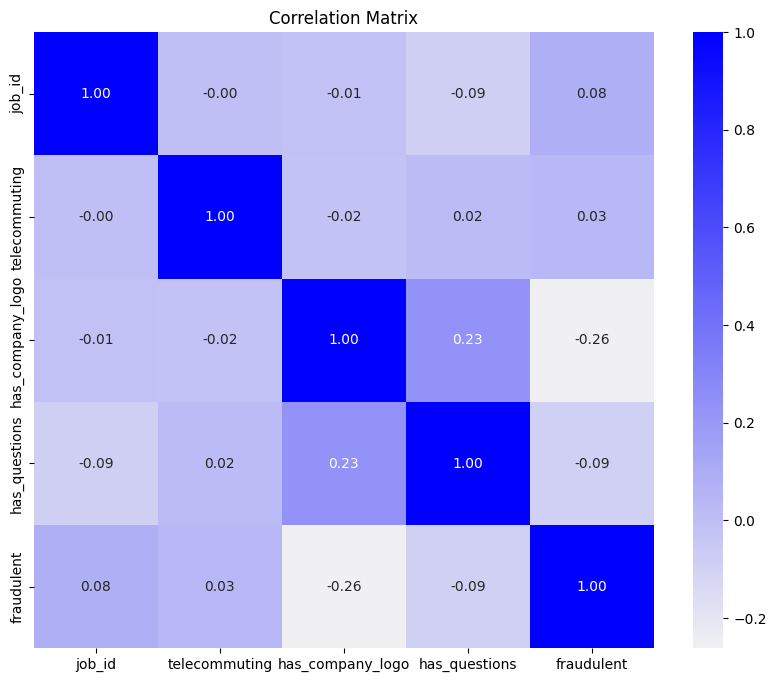

In [91]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

blue_cmap = sns.light_palette("#0000FF", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap=blue_cmap, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


><p style="font-family:'Merriweather' ; color:#4682B4; font-size:110%; text-align:left;">There’s a slight negative correlation of -0.09 between fraudulent and has_questions, and a very weak positive correlation of 0.03 with telecommuting, indicating no strong relationship with fraud.Job_id shows no correlation with fraudulent, while features like has_company_logo and has_questions are more useful for identifying fraudulent postings. These weak correlations may suggest non-linear relationships or the need for feature transformations.

<br><b><p style="font-family:'OccamSeraser'; color:#3E2A47; font-size:120%; text-align:left;">2.1.1 Dropping Unnecessary Columns</b></p>

In [92]:
# Dropping unnecessary columns
columns_to_drop = ['job_id','location','telecommuting','department','salary_range','has_company_logo','has_questions']  # Columns deemed irrelevant
df_cleaned=df.drop(columns=columns_to_drop)

><p style="font-family:'Merriweather' ; color:#4682B4; font-size:110%; text-align:left;">These columns were dropped because they were deemed irrelevant for the analysis and model-building process. The columns job_id, location, telecommuting, department, salary_range, has_company_logo, and has_questions were removed as they either do not provide useful predictive value. Dropping these columns helps reduce the complexity of the dataset, improving model performance by focusing on more relevant features

In [93]:
df_cleaned.head()

,title,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [94]:
# Count the number of duplicate rows
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 1679


In [95]:
# Remove duplicates (keeping the first occurrence)
df_cleaned = df_cleaned.drop_duplicates()

In [96]:
# Count the number of duplicate rows after remove
duplicate_count = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


<br><b><p style="font-family:'OccamSeraser';color:#3E2A47; font-size:120%; text-align:left;">2.1.2 Handling Missing Values</b></p>

In [97]:
# View percentage of missing values per column
print('Percent of Null Values in Each Column:\n')
print(df_cleaned.isnull().mean() * 100)

Percent of Null Values in Each Column:

title                   0.000000
company_profile        19.221036
description             0.006172
requirements           14.449725
benefits               41.670267
employment_type        19.955558
required_experience    37.170545
required_education     46.441578
industry               28.059996
function               33.843590
fraudulent              0.000000
dtype: float64


><p style="font-family:'Merriweather' ; color:#4682B4; font-size:110%; text-align:left;">This output reveals the percentage of missing values for each column, showing that **required_education** and **benefits** have the highest proportions of null values, while columns like **title** and **fraudulent** are fully populated.

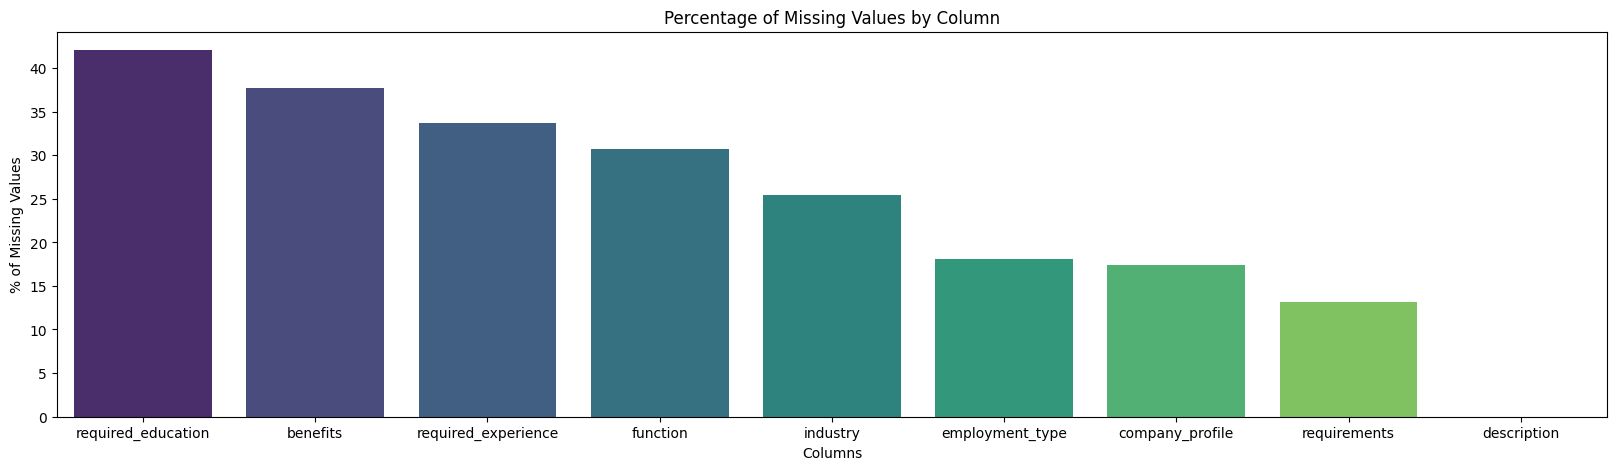

In [98]:
# Count and display percentage of missing values
missing_percent = (df_cleaned.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Create a DataFrame to use with seaborn
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing Percent']

# Create the barplot 
plt.figure(figsize = (20, 5))
sns.barplot(x='Column', y='Missing Percent', data=missing_df, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.show()


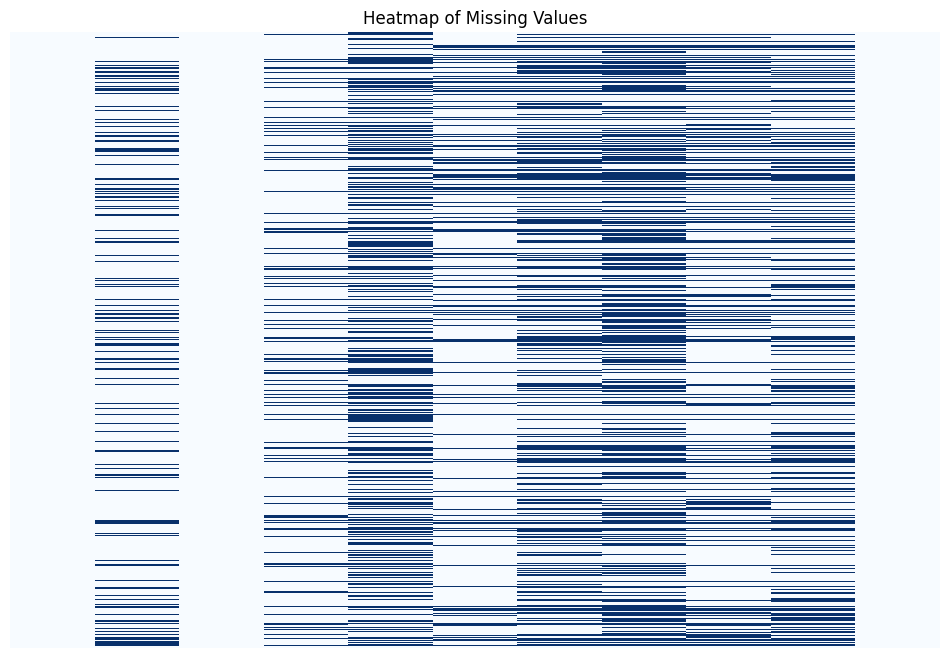

In [99]:
# Create a heatmap to show missing values (True for missing, False for not missing)
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()


In [100]:
# For text columns, replace missing values with "Missing"
text_columns = ['title', 'company_profile', 'description', 'requirements','benefits']
df_cleaned[text_columns] = df_cleaned[text_columns].fillna('Missing')

# For other categorical columns, replace missing values with relevant placeholders
df_cleaned['employment_type'] = df_cleaned['employment_type'].fillna('Not Specified')
df_cleaned['required_experience'] = df_cleaned['required_experience'].fillna('Not Specified')
df_cleaned['required_education'] = df_cleaned['required_education'].fillna('Not Specified')
df_cleaned['industry'] = df_cleaned['industry'].fillna('Not Specified')
df_cleaned['function'] = df_cleaned['function'].fillna('Not Specified')
df_cleaned.isnull().sum()

title                  0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

><p style="font-family:'Merriweather' ; color:#4682B4; font-size:110%; text-align:left;">Missing values were replaced with placeholders like "Missing" and "Not Specified" to ensure data completeness and maintain the integrity of the dataset. This approach prevents issues in analysis or modeling while clearly indicating where information is absent.

<br><b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">2.2 Data Visualization

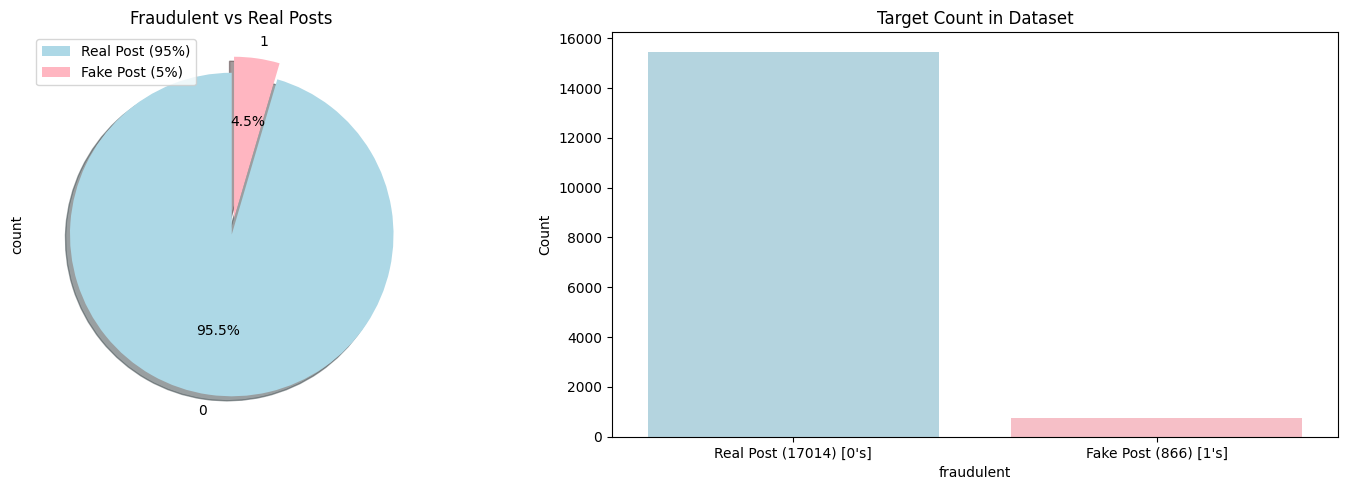

In [101]:
pastel_colors = ['#ADD8E6', '#FFB6C1']
sns.set_palette(sns.color_palette(pastel_colors))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
temp = df_cleaned["fraudulent"].value_counts()
temp.plot(
    kind='pie',
    explode=[0, 0.1],  
    autopct='%1.1f%%',  
    colors=pastel_colors,
    shadow=True,
    startangle=90
)
plt.title('Fraudulent vs Real Posts')
plt.legend(labels=['Real Post (95%)', 'Fake Post (5%)'])
plt.subplot(1, 2, 2)
sns.barplot(
    x=temp.index,
    y=temp.values,
    palette=pastel_colors
)
plt.ylabel('Count')
plt.title('Target Count in Dataset')
plt.xticks([0, 1], ["Real Post (17014) [0's]", "Fake Post (866) [1's]"])
plt.tight_layout()
plt.show()


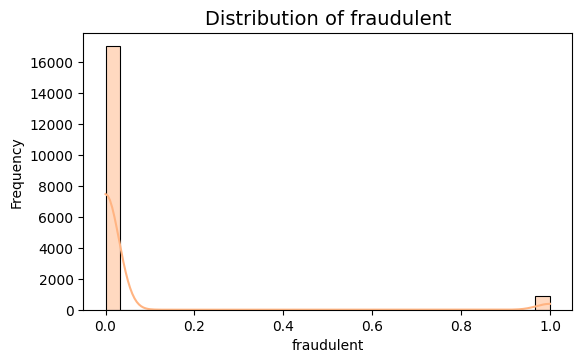

In [102]:
# Numeric variables
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

# Histograms for each numeric column 
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))])
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">Class distributions are **95% for 0 (Real Post)** and **5% for 1 (Fake Post).** Target distribution is highly imbalanced.

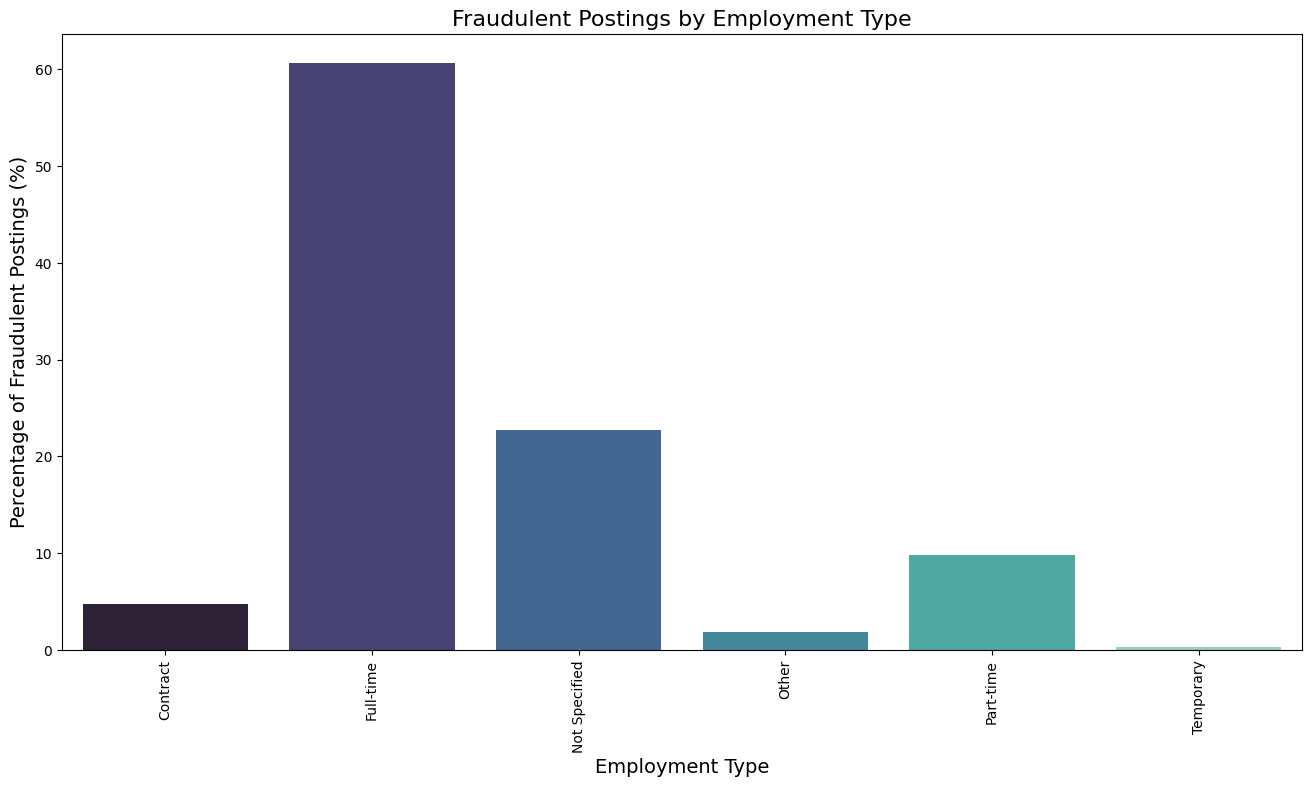

In [103]:
employment_data = df_cleaned.groupby('employment_type').agg({'fraudulent': 'sum'}).reset_index()
employment_data['percent'] = (employment_data['fraudulent'] / employment_data['fraudulent'].sum()) * 100
plt.figure(figsize=(16, 8))
sns.barplot(data=employment_data, x='employment_type', y='percent', palette='mako')
plt.xticks(rotation=90)
plt.title('Fraudulent Postings by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=14)
plt.ylabel('Percentage of Fraudulent Postings (%)', fontsize=14)
plt.show()


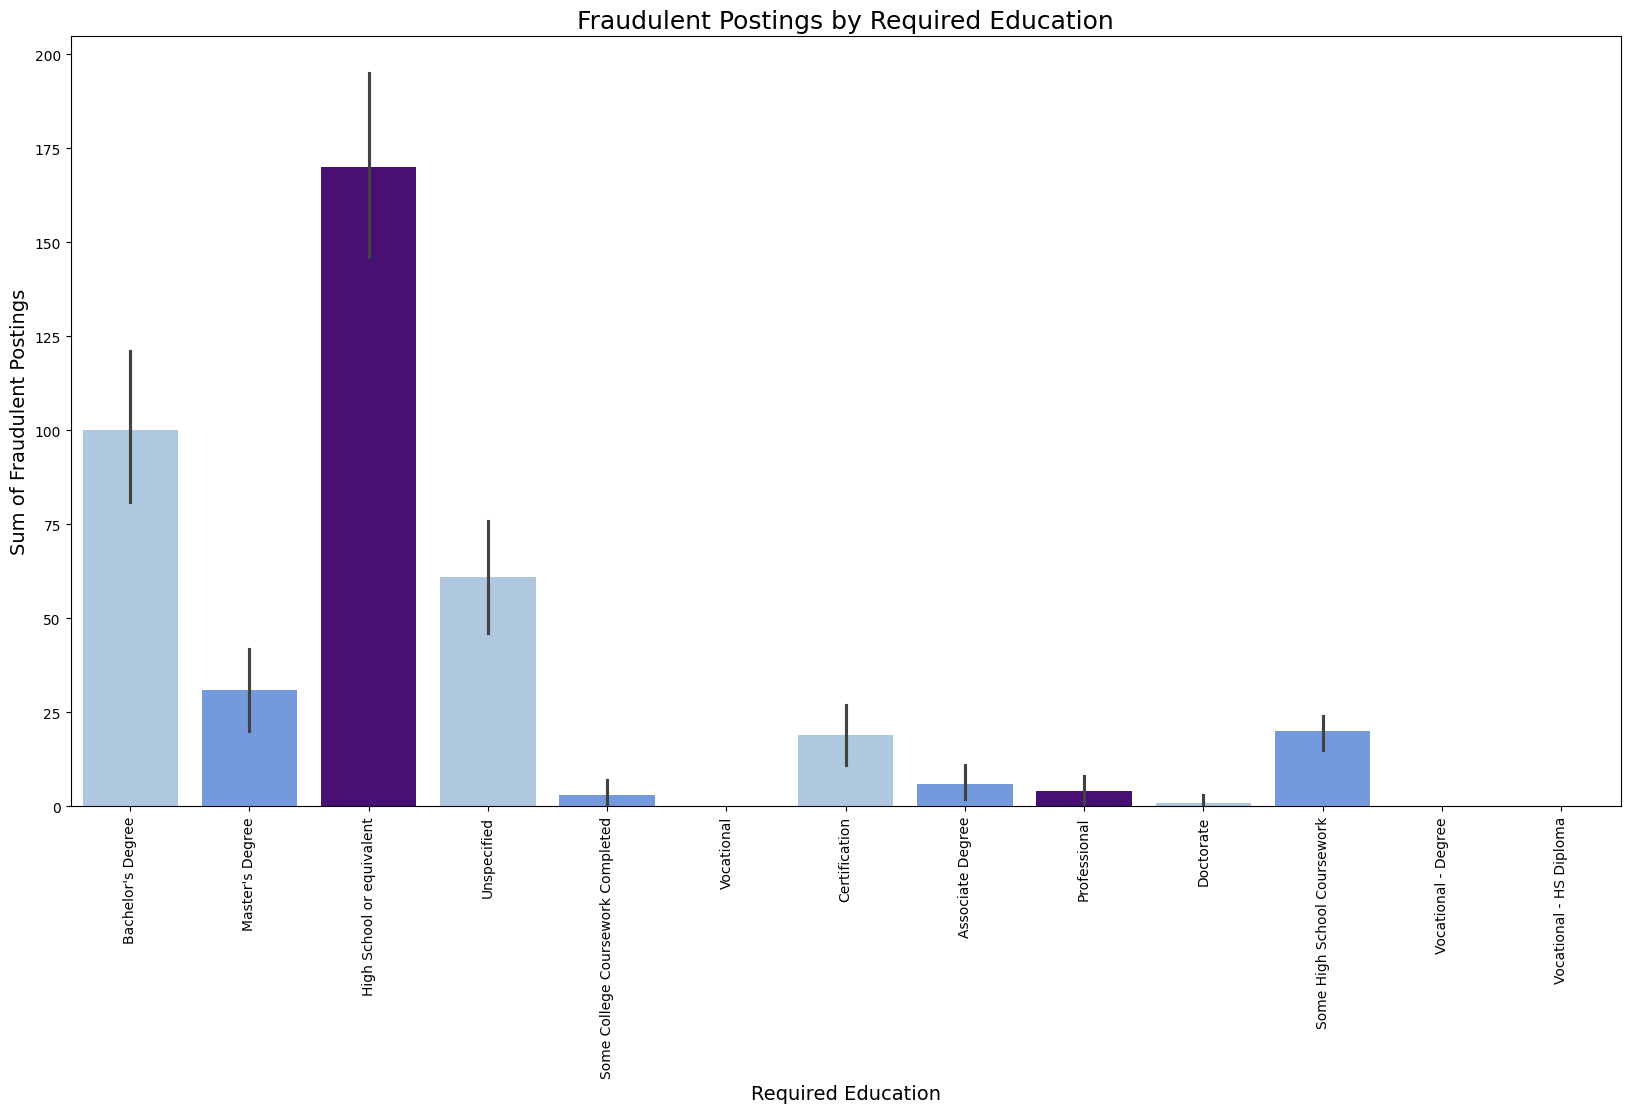

In [104]:
# Get the number of unique values in 'required_education'
num_unique_education = len(df_cleaned['required_education'].unique())
colors = ['#A7C7E7', '#6495ED', '#4B0082'] 
if num_unique_education > len(colors):
    colors = colors * (num_unique_education // len(colors)) + colors[:num_unique_education % len(colors)]

# Plot the barplot for 'required_education' with the sum of 'fraudulent' posts
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum, hue='required_education', palette=colors)

# Title and labels
plt.title('Fraudulent Postings by Required Education', fontsize=18)
plt.xlabel('Required Education', fontsize=14)
plt.ylabel('Sum of Fraudulent Postings', fontsize=14)
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)
plt.show()


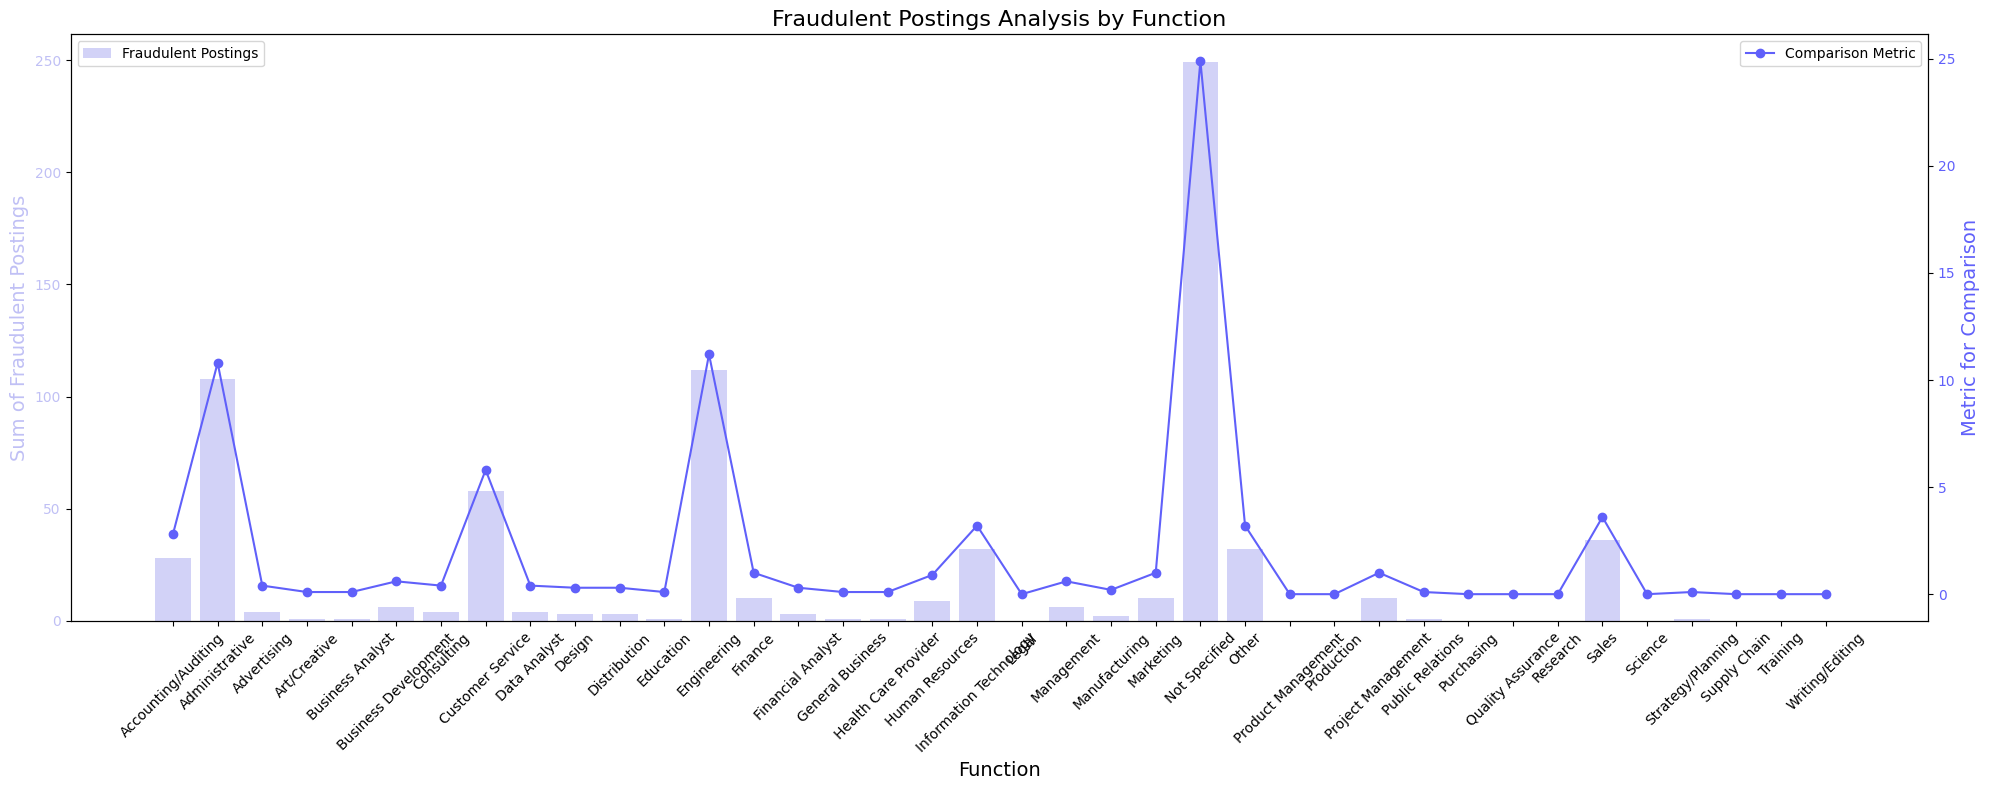

In [105]:
# Prepare the data for analysis
# Group by 'function' and calculate the sum of 'fraudulent' values
fraudulent_summary = df_cleaned.groupby('function')['fraudulent'].sum().reset_index()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(20, 8))
blue_palette = sns.light_palette("blue", reverse=True)

# Bar chart: Sum of fraudulent postings by function
ax1.bar(fraudulent_summary['function'], fraudulent_summary['fraudulent'], 
        color=blue_palette[4], alpha=0.7, label='Fraudulent Postings')

# Configure the first Y-axis for the bar chart
ax1.set_xlabel('Function', fontsize=14)  # Label for the X-axis
ax1.set_ylabel('Sum of Fraudulent Postings', color=blue_palette[4], fontsize=14)  # Label for the Y-axis
ax1.tick_params(axis='y', labelcolor=blue_palette[4])  # Set tick color for the Y-axis

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Add a second Y-axis for another metric (e.g., transformed or additional metric)
ax2 = ax1.twinx()
ax2.plot(fraudulent_summary['function'], fraudulent_summary['fraudulent'] * 0.1, 
         color=blue_palette[2], marker='o', label='Comparison Metric')

# Configure the second Y-axis for the line chart
ax2.set_ylabel('Metric for Comparison', color=blue_palette[2], fontsize=14)  # Label for the second Y-axis
ax2.tick_params(axis='y', labelcolor=blue_palette[2])  # Set tick color for the second Y-axis

# Add a title to the plot
plt.title('Fraudulent Postings Analysis by Function', fontsize=16)

# Add legends for both axes
ax1.legend(loc='upper left')  # Legend for the bar chart
ax2.legend(loc='upper right')  # Legend for the line chart

# Adjust layout to prevent overlap between elements
plt.tight_layout()

# Display the plot
plt.show()


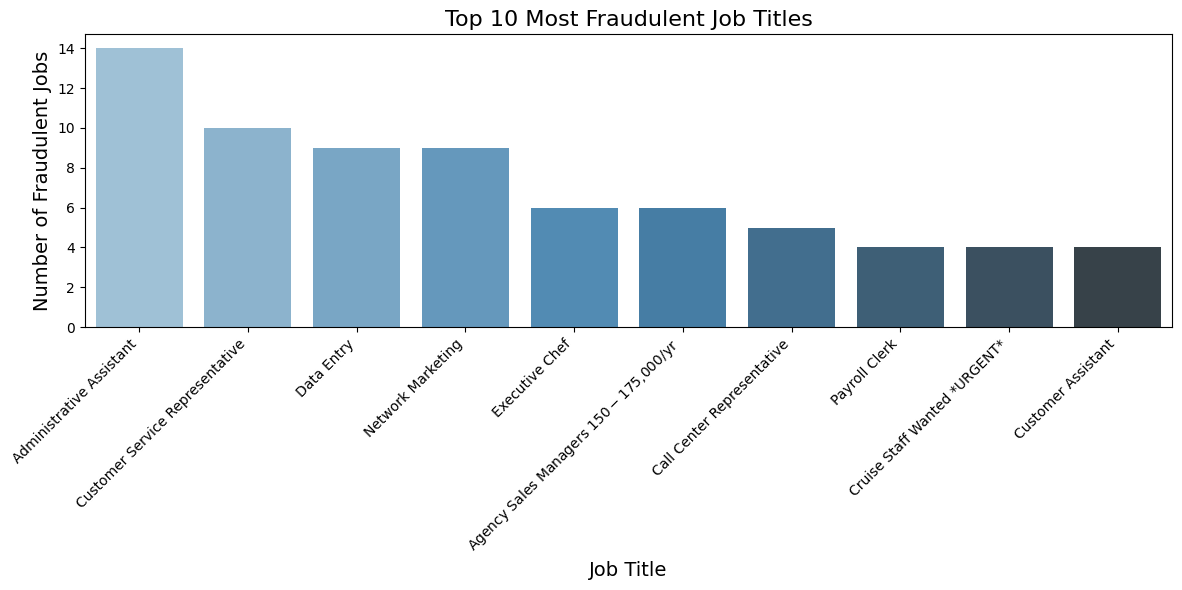

title
Administrative Assistant                  14
Customer Service Representative           10
Data Entry                                 9
Network Marketing                          9
Executive Chef                             6
Agency Sales Managers $150-$175,000/yr     6
Call Center Representative                 5
Payroll Clerk                              4
Cruise Staff Wanted *URGENT*               4
Customer Assistant                         4
Name: count, dtype: int64


In [106]:
# Get the top 10 fraudulent job titles
fraudulent_titles = df_cleaned[df_cleaned['fraudulent'] == 1]['title'].value_counts()[:10]

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=fraudulent_titles.index, y=fraudulent_titles.values, palette='Blues_d')

# Add labels and title
plt.title('Top 10 Most Fraudulent Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Number of Fraudulent Jobs', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(df_cleaned[df_cleaned.fraudulent==1].title.value_counts()[:10])

><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">The top 10 most fraudulent job titles in the dataset are dominated by roles such as Administrative Assistant, Customer Service Representative, and Data Entry, with job titles like 'Network Marketing' and 'Executive Chef' also appearing frequently. These roles seem to be associated with higher counts of fraudulent postings, potentially due to vague or misleading job descriptions.

<br><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">Through a detailed examination of the dataset, we identified trends and patterns that are crucial for understanding the underlying structure and relationships within the data. Notably, several variables were found to have significant distributions, highlighting potential areas of focus for further analysis. Additionally, correlations between specific features were observed, providing valuable context for feature engineering in the modeling phase. This initial analysis also revealed potential outliers and missing data, which will guide the cleaning process and impact the subsequent steps of data preprocessing and modeling.



<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;">
    III.  Feature Engineering 🔄</p></b>

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">3.1 Encoding Categorical Features for Model Training

In [107]:
low_cardinality_cols = ['employment_type', 'required_experience']
high_cardinality_cols = ['required_education', 'industry', 'function']
df_cleaned = pd.get_dummies(df_cleaned, columns=low_cardinality_cols, drop_first=True)
target_encoder = ce.TargetEncoder(cols=high_cardinality_cols)
df_cleaned[high_cardinality_cols] = target_encoder.fit_transform(df_cleaned[high_cardinality_cols], df_cleaned['fraudulent'])
print("Encoding complete. Preview of the encoded data:")
print(df_cleaned.head())


Encoding complete. Preview of the encoded data:
                                       title  \
0                           Marketing Intern   
1  Customer Service - Cloud Video Production   
2    Commissioning Machinery Assistant (CMA)   
3          Account Executive - Washington DC   
4                        Bill Review Manager   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATI

><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">This section encodes categorical variables for machine learning. Binary features are transformed into 0/1 values, low cardinality columns are one-hot encoded, and high cardinality columns are target encoded. This preprocessing ensures the data is ready for model training while preserving the relevance of each feature.

In [108]:
joblib.dump(target_encoder ,'target_encoder.pkl')

['target_encoder.pkl']

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">3.2  Text Preprocessing

<b><p style="font-family:'OccamSeraser'; color:#3E2A47; font-size:120%; text-align:left;">3.2.1  Lemmatization, Stopwords Removal, and Text Cleaning

In [109]:
# Download necessary resources 
nltk.download('stopwords')
nltk.download('wordnet')
# Initialize the lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization and remove stopwords
    tokens = text.split()
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join cleaned tokens back into a single string
    return " ".join(tokens)

# Apply preprocessing to each text column
df_cleaned['title'] = df_cleaned['title'].apply(preprocess_text)
df_cleaned['description'] = df_cleaned['description'].apply(preprocess_text)
df_cleaned['requirements'] = df_cleaned['requirements'].apply(preprocess_text)
df_cleaned['benefits'] = df_cleaned['benefits'].apply(preprocess_text)
df_cleaned['company_profile'] = df_cleaned['company_profile'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">This title summarizes the text processing steps in the code, which include lemmatization, stopwords removal, lowercase conversion, and the removal of digits and punctuation.These steps are applied to clean the text columns in a job-related dataset, such as title, description, requirements, benefits, and company profile, preparing the data for analysis or machine learning models.

In [110]:
df_cleaned.head()

,title,company_profile,description,requirements,benefits,required_education,industry,function,fraudulent,employment_type_Full-time,...,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Not Specified
0,marketing intern,food weve created groundbreaking awardwinning ...,food fastgrowing james beard awardwinning onli...,experience content management system major plu...,missing,0.047847,0.046854,0.012422,0,False,...,True,False,False,False,False,False,True,False,False,False
1,customer service cloud video production,second world cloud video production service se...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part second team gainexperience ...,0.047847,0.055767,0.052536,0,True,...,False,False,False,False,False,False,False,False,True,False
2,commissioning machinery assistant cma,valor service provides workforce solution meet...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,missing,0.047847,0.046854,0.045413,0,False,...,False,False,False,False,False,False,False,False,False,True
3,account executive washington dc,passion improving quality life geography heart...,company esri environmental system research ins...,education bachelor master gi business administ...,culture anything corporatewe collaborative cre...,0.022410,0.003776,0.026647,0,True,...,False,False,False,False,False,False,False,True,False,False
4,bill review manager,spotsource solution llc global human capital m...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefit offered,0.022410,0.096234,0.003106,0,True,...,False,False,False,False,False,False,False,True,False,False


<b><p style="font-family:'OccamSeraser'; color:#3E2A47; font-size:120%; text-align:left;">3.2.2  TF-IDF Vectorization

In [111]:

# Create a new 'company' column by combining the text columns
df_cleaned['company'] = df_cleaned['title'].fillna('') + df_cleaned['description'].fillna('') + " " + df_cleaned['requirements'].fillna('') + " " + df_cleaned['company_profile'].fillna('') + " " + df_cleaned['benefits'].fillna('')

# Apply TF-IDF on the 'company' column
tfidf = TfidfVectorizer(max_features=500)  # Limit to 500 features to avoid high dimensionality

# Transform the 'company' column into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df_cleaned['company'])

# Convert the TF-IDF matrix into a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Add the new TF-IDF columns to the original DataFrame
df_cleaned = pd.concat([df_cleaned, df_tfidf], axis=1)

# Drop the original columns to avoid redundancy
df_cleaned = df_cleaned.drop(['title', 'description', 'requirements', 'company_profile', 'benefits', 'company'], axis=1)


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">This code combines text data from various columns (title, description, requirements, company profile, and benefits) into a single column called 'company'. It then applies TF-IDF (Term Frequency-Inverse Document Frequency) to this column to extract important features, limiting the number of features to 500 to reduce dimensionality. The resulting TF-IDF matrix is converted into a DataFrame, which is then merged with the original DataFrame. Finally, the original text columns are dropped to avoid redundancy, leaving only the new feature columns for further analysis or machine learning

In [112]:
joblib.dump(tfidf, 'tfidf_transformer.pkl')

['tfidf_transformer.pkl']

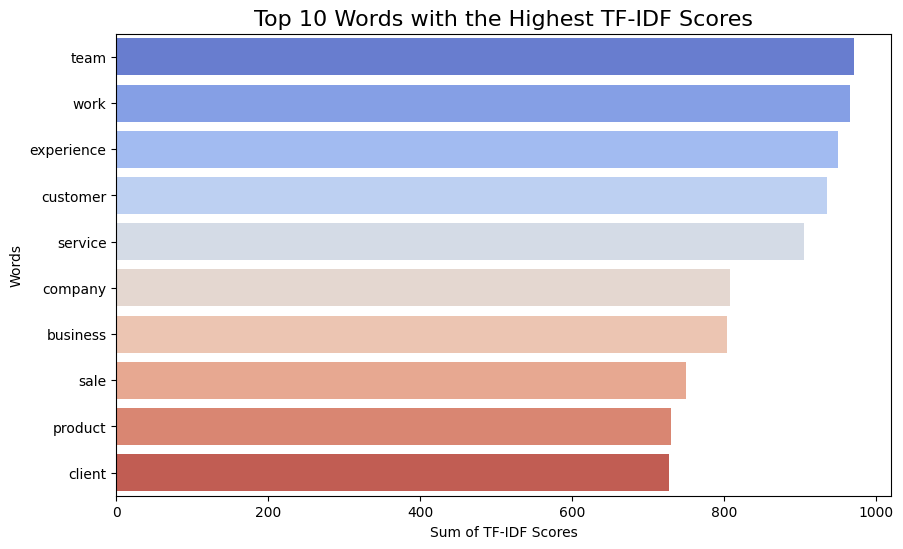

In [113]:
# Sum the TF-IDF scores for each word across all rows
tfidf_sum = df_tfidf.sum().sort_values(ascending=False)

# Plot the top 10 words with the highest TF-IDF scores
top_words = tfidf_sum.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index, palette='coolwarm')
plt.title("Top 10 Words with the Highest TF-IDF Scores", fontsize=16)
plt.xlabel("Sum of TF-IDF Scores")
plt.ylabel("Words")
plt.show()


In [119]:
joblib.dump(df_cleaned.columns.tolist(), 'encoded_columns.pkl')

['encoded_columns.pkl']

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">3.3  Data Balancing with SMOTE

In [114]:
# 1. Create independent (X) and dependent (Y) features
# Extract column names from the cleaned dataset
columns = df_cleaned.columns.tolist()

# Ensure no duplicate columns exist
if df_cleaned.columns.duplicated().any():
    print("Duplicate column names detected! Renaming...")
    df_cleaned.columns = [f"{col}_{i}" if col in df_cleaned.columns[:i] else col for i, col in enumerate(df_cleaned.columns)]

# Exclude the target variable ('fraudulent') from the features
columns = [c for c in columns if c not in ["fraudulent"]]

# Define the independent features (X) and target variable (Y)
X = df_cleaned[columns]
Y = df_cleaned["fraudulent"]

# Fill missing values
Y = Y.fillna(Y.mode()[0])  # Replace NaN in target with the most frequent value
X = X.fillna(X.mode().iloc[0])  # Replace NaN in features with the most frequent value

# Check the shapes of X and Y
print("Shape of independent features (X):", X.shape)
print("Shape of target variable (Y):", Y.shape)

# 2. Handle class imbalance using SMOTE
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to create a balanced dataset
X_res, y_res = smote.fit_resample(X, Y)

# Check the shapes after applying SMOTE
print("Shape of X after SMOTE:", X_res.shape)
print("Shape of Y after SMOTE:", y_res.shape)

# 3. Convert resampled data back to DataFrames
# Convert X_res and y_res to DataFrames
df_X_res = pd.DataFrame(X_res)
df_X_res.columns = columns  # Assign original column names back to the resampled data

df_y_res = pd.DataFrame(y_res, columns=["fraudulent"])

# Combine the resampled features and target variable
df_cleaned = pd.concat([df_X_res, df_y_res], axis=1)

# 4. Inspect the balanced dataset
# Print the first few rows of the balanced dataset
print("First few rows of the balanced dataset:")
print(df_cleaned.head())


Duplicate column names detected! Renaming...
Shape of independent features (X): (17626, 514)
Shape of target variable (Y): (17626,)
Shape of X after SMOTE: (33780, 514)
Shape of Y after SMOTE: (33780,)
First few rows of the balanced dataset:
   required_education  industry  function  employment_type_Full-time  \
0            0.047847  0.046854  0.012422                      False   
1            0.047847  0.055767  0.052536                       True   
2            0.047847  0.046854  0.045413                      False   
3            0.022410  0.003776  0.026647                       True   
4            0.022410  0.096234  0.003106                       True   

   employment_type_Not Specified  employment_type_Other  \
0                          False                   True   
1                          False                  False   
2                           True                  False   
3                          False                  False   
4                          Fal

><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">The process of creating independent and dependent features involves separating the dataset into the predictor variables (independent features, X) and the target variable (dependent feature, Y). In this case, the target variable, "fraudulent," indicates whether a job posting is fraudulent or not, while the independent features are all the other columns in the dataset, excluding "fraudulent."To address the class imbalance, SMOTE (Synthetic Minority Over-sampling Technique) is applied. SMOTE works by generating synthetic samples for the minority class (fraudulent job postings) rather than by under-sampling the majority class. This technique helps to balance the dataset without losing valuable data from the majority class. After applying SMOTE, the dataset is reshaped, with an equal or more balanced representation of both classes. Finally, the resampled data is merged back into a cleaned dataframe for further analysis

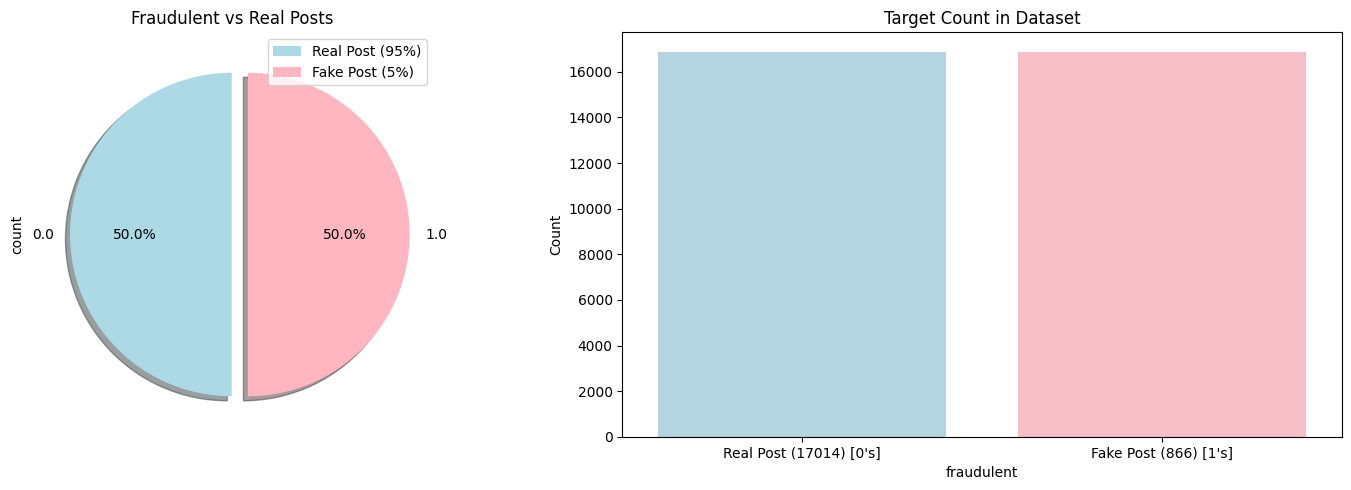

In [115]:
pastel_colors = ['#ADD8E6', '#FFB6C1']
sns.set_palette(sns.color_palette(pastel_colors))
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
temp = df_cleaned["fraudulent"].value_counts()
temp.plot(
    kind='pie',
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    colors=pastel_colors,
    shadow=True,
    startangle=90
)
plt.title('Fraudulent vs Real Posts')
plt.legend(labels=['Real Post (95%)', 'Fake Post (5%)'])
plt.subplot(1, 2, 2)
sns.barplot(
    x=temp.index,
    y=temp.values,
    palette=pastel_colors
)
plt.ylabel('Count')
plt.title('Target Count in Dataset')
plt.xticks([0, 1], ["Real Post (17014) [0's]", "Fake Post (866) [1's]"])
plt.tight_layout()
plt.show()


<b><p style="font-family:'OccamSeraser'; color:#3E2A47; font-size:120%; text-align:left;">3.3.4  Creating Train-Test Sets

In [65]:
X = df_cleaned.drop('fraudulent', axis=1) 
y = df_cleaned['fraudulent'] 
y = y.fillna(y.mode()[0]) 
X = X.fillna(y.mode()[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


><p style="font-family:'Merriweather' ; color:black; font-size:110%; text-align:left;">This code prepares the dataset by separating the features (X) and the target (y). The target column 'fraudulent' is isolated, and missing values in both X and y are handled by filling NaN values with the most frequent value (mode). Afterward, the dataset is split into training and testing sets using train_test_split, with a test size of 20%. Stratification ensures that the distribution of the target variable is preserved in both the training and test sets.

In [67]:
df_cleaned.head()


,required_education,industry,function,employment_type_Full-time,employment_type_Not Specified,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,work,working,world,would,writing,written,year,youll,youre,fraudulent
0,0.047847,0.046854,0.012422,False,False,True,False,False,False,False,...,0.045926,0.062255,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.047847,0.055767,0.052536,True,False,False,False,False,False,False,...,0.027425,0.074351,0.164037,0.021272,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.047847,0.046854,0.045413,False,True,False,False,False,False,False,...,0.072848,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.022410,0.003776,0.026647,True,False,False,False,False,False,False,...,0.057785,0.000000,0.138252,0.000000,0.0,0.036322,0.045335,0.0,0.0,0.0
4,0.022410,0.096234,0.003106,True,False,False,False,False,False,False,...,0.047529,0.032213,0.000000,0.000000,0.0,0.000000,0.027966,0.0,0.0,0.0


In [70]:
df_cleaned.info

<bound method DataFrame.info of        required_education  industry  function  employment_type_Full-time  \
0                0.047847  0.046854  0.012422                      False   
1                0.047847  0.055767  0.052536                       True   
2                0.047847  0.046854  0.045413                      False   
3                0.022410  0.003776  0.026647                       True   
4                0.022410  0.096234  0.003106                       True   
...                   ...       ...       ...                        ...   
33775            0.069195  0.046854  0.029804                      False   
33776            0.510028  0.046854  0.180301                      False   
33777            0.047847  0.049145  0.045413                       True   
33778            0.047847  0.046854  0.045413                       True   
33779            0.047847  0.046854  0.045413                      False   

       employment_type_Not Specified  employment_type_O

<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;"> IV Model building 🤖

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;"> 1.Multinomial Naive Bayes



The first prediction model used was the multinomial Bayes, it is a distribution parameterized by vectors. Vectors are representations of an observation obtained by the probability of an event x occurring. So the vector is estimated by the formula:

## $\hat\theta_{yi}=\frac{N_{yi}+\alpha}{N_y + \alpha N}$

Where $N_{yi}$ is the number of occurrences of the analyzed characteristic appearing in the training dataset, $N_y$ is the number of unique occurrences, $N$ is the number of total occurrences, and alpha is a constant that prevents the probability from being equal to 0. If alpha has the value equal to 1, it is called Laplace, if alpha is greater than 1, it is called Lidstone.

We chose this model because it can predict our objective with some precision. Thanks to the mining carried out on the database, the model becomes effective in working with the probabilities of each column and sorting based on this information.


In [40]:
# 1. Define the hyperparameters to test for RandomizedSearchCV
param_dist = {
    'alpha': np.logspace(-3, 3, 7),  # Smoothing parameter
    'fit_prior': [True, False],       # If True, adjusts class priors
    'class_prior': [None, 'uniform'],  # Choose either None or uniform priors
}

# 2. Initialize the Multinomial Naive Bayes model
nb_model = MultinomialNB()

# 3. Apply RandomizedSearchCV to optimize hyperparameters
random_search = RandomizedSearchCV(nb_model, param_distributions=param_dist, n_iter=30, cv=10, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

# 4. Display the best parameters found
print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_

# 5. Use cross_validate with the best model to obtain detailed metrics
cv_results = cross_validate(best_model, X_train, y_train, cv=10,
                            scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                            return_estimator=True)

# 6. Display the classification report for each fold
for fold, estimator in enumerate(cv_results['estimator']):
    y_pred_fold = estimator.predict(X_train)
    print(f"Classification Report for fold {fold+1}:\n", classification_report(y_train, y_pred_fold))

# 7. Final evaluation on the test set
y_pred_final = best_model.predict(X_test)
print("Classification Report on the test set:\n", classification_report(y_test, y_pred_final))

# 8. Calculate the metrics for the test set
test_metrics0 = {
    'Model': "Multinomial Naive Bayes",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test, y_pred_final, average='weighted'),
    'Precision': precision_score(y_test, y_pred_final,average='weighted'),
    'Recall': recall_score(y_test, y_pred_final, average='weighted')
}

# 9. Convert the results into a DataFrame
df_metrics0 = pd.DataFrame([test_metrics0])

# 10. Generate the HTML table
html_table = df_metrics0.to_html(index=False, classes="table table-bordered table-striped")

# 11. Display the table in Jupyter Notebook
display(HTML(html_table))


Best parameters found: {'fit_prior': True, 'class_prior': None, 'alpha': 10.0}
Classification Report for fold 1:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     13512
         1.0       0.85      0.80      0.82     13512

    accuracy                           0.83     27024
   macro avg       0.83      0.83      0.83     27024
weighted avg       0.83      0.83      0.83     27024

Classification Report for fold 2:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     13512
         1.0       0.85      0.80      0.82     13512

    accuracy                           0.83     27024
   macro avg       0.83      0.83      0.83     27024
weighted avg       0.83      0.83      0.83     27024

Classification Report for fold 3:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     13512
         1.0       0.85      0.80      0.82     13512

Model,Data,Accuracy,F1-Score,Precision,Recall
Multinomial Naive Bayes,Test,0.835702,0.835402,0.83816,0.835702


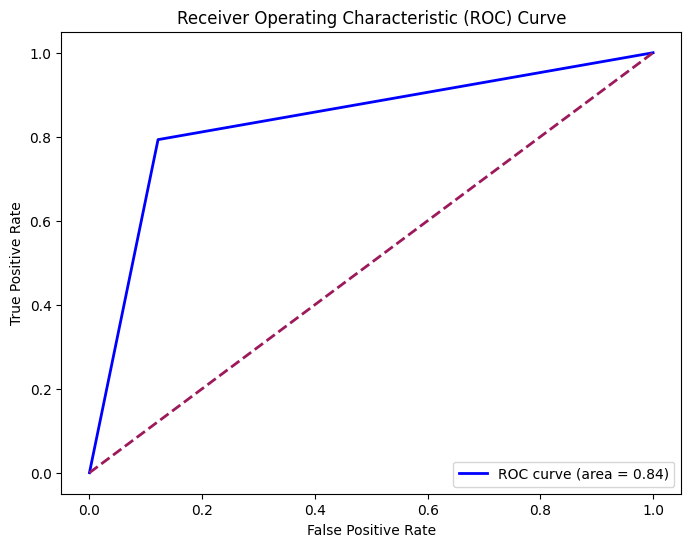

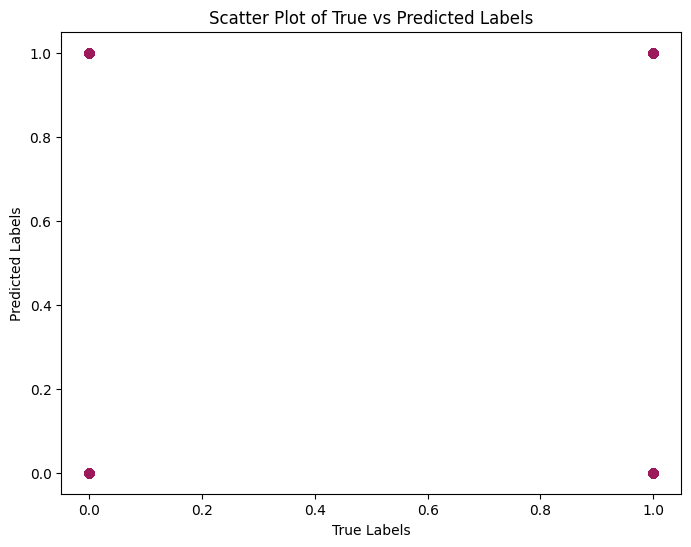

In [41]:
# 1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  
plt.plot([0, 1], [0, 1], color='#9C1A5B', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 2. Scatter Plot for predictions vs true labels
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, color='#9C1A5B', alpha=0.5)  
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.title('Scatter Plot of True vs Predicted Labels')
plt.show()


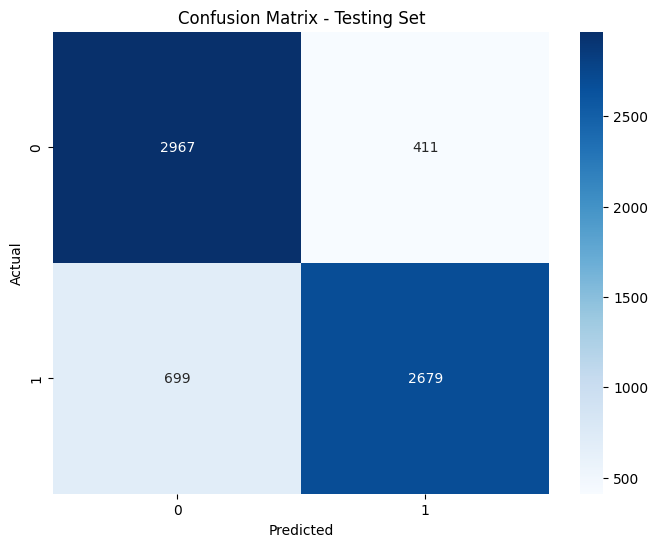

In [42]:
# 1. Predict on the training set
y_pred_final = best_model.predict(X_test)
# 2. Compute the confusion matrix
cm_train = confusion_matrix(y_test, y_pred_final)
# 3. Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">2.  Logistic Regression

Logistic Regression is a predictive model used for binary and multiclass classification tasks. Unlike Naive Bayes, which estimates the probability of an event using a parametric distribution, Logistic Regression uses a logistic function to model the probability of a certain class. The logistic function is:


## $\hat{y} = \frac{1}{1 + e^{-z}}$
Where $z$ is a linear combination of input features:

$z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
In Logistic Regression, the coefficients $\beta_0, \beta_1, ..., \beta_n$ are learned during training using optimization techniques, often maximizing the likelihood of the observed data. The logistic function then transforms the output of the linear combination into a probability between 0 and 1.

We chose this model because it's interpretable, works well for binary classification, and performs well even with linearly separable data. Additionally, Logistic Regression has the benefit of providing probabilities, which are useful for many decision-making processes.

In [43]:
# ============================ Hyperparameter Optimization for LogisticRegression ============================
param_dist = {'C': np.logspace(-4, 4, 20),  # Values for 'C' on a logarithmic scale
              'penalty': ['l1', 'l2'],     # L1 and L2 regularization
              'solver': ['liblinear']}      # Solver compatible with L1

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Hyperparameter optimization with RandomizedSearchCV
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=10, cv=5, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

# Best model found
print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_

# ============================ Evaluation with cross_validate ============================
cv_results = cross_validate(best_model, X_train, y_train, cv=5,
                            scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                            return_estimator=True)

# Classification report for each fold
for fold, estimator in enumerate(cv_results['estimator']):
    y_pred_fold = estimator.predict(X_train)
    print(f"Classification Report for fold {fold+1}:\n", classification_report(y_train, y_pred_fold))

# Final evaluation on the test set
y_pred_final = best_model.predict(X_test)
print("Classification Report on the test set:\n", classification_report(y_test, y_pred_final))

# ============================ AdaBoost Application ============================
# Initialize the AdaBoost model with LogisticRegression as the base estimator
ada_model = AdaBoostClassifier(estimator=LogisticRegression(solver='liblinear', penalty='l2', C=4.281332398719395), random_state=42)

# Train the AdaBoost model
ada_model.fit(X_train, y_train)

# Evaluation with cross_validate for AdaBoost
cv_results_ada = cross_validate(ada_model, X_train, y_train, cv=5,
                                scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                                return_estimator=True)

# Results for each fold
for fold, estimator in enumerate(cv_results_ada['estimator']):
    y_pred_fold = estimator.predict(X_train)
    print(f"Classification Report for fold {fold+1} with AdaBoost:\n", classification_report(y_train, y_pred_fold))

# Final evaluation of AdaBoost on the test set
y_pred_final_ada = ada_model.predict(X_test)
print("Classification Report on the test set with AdaBoost:\n", classification_report(y_test, y_pred_final_ada))

# ============================ Gradient Boosting Application ============================
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Evaluation with cross_validate for Gradient Boosting
cv_results_gb = cross_validate(gb_model, X_train, y_train, cv=5,
                               scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                               return_estimator=True)

# Results for each fold
for fold, estimator in enumerate(cv_results_gb['estimator']):
    y_pred_fold = estimator.predict(X_train)
    print(f"Classification Report for fold {fold+1} with Gradient Boosting:\n", classification_report(y_train, y_pred_fold))

# Final evaluation of Gradient Boosting on the test set
y_pred_final_gb = gb_model.predict(X_test)
print("Classification Report on the test set with Gradient Boosting:\n", classification_report(y_test, y_pred_final_gb))

# Accuracy calculation (commented out)
#acc = accuracy_score(y_pred_final_gb, y_test) 
#print("Accuracy with Gradient Boosting =", acc)

# 3. Calculate metrics for training
train_metrics1 = {
    'Model': "Logistic Regression",
    'Data': 'Training',
    'Accuracy': accuracy_score(y_train,  y_pred_fold),
    'F1-Score': f1_score(y_train,  y_pred_fold, average='weighted'),
    'Precision': precision_score(y_train,  y_pred_fold, average='weighted'),
    'Recall': recall_score(y_train,  y_pred_fold, average='weighted')
}

# 4. Calculate metrics for test
test_metrics1 = {
    'Model': "Logistic Regression",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final_gb),
    'F1-Score': f1_score(y_test,y_pred_final_gb, average='weighted'),
    'Precision': precision_score(y_test, y_pred_final_gb, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final_gb, average='weighted')
}

# 5. Convert results into DataFrame
df_metrics1 = pd.DataFrame([train_metrics1, test_metrics1])

# 6. Generate HTML table
html_table = df_metrics1.to_html(index=False, classes="table table-bordered table-striped")

# 7. Display the table in Jupyter Notebook
display(HTML(html_table))


Best parameters found: {'solver': 'liblinear', 'penalty': 'l2', 'C': 29.763514416313132}
Classification Report for fold 1:
               precision    recall  f1-score   support

         0.0       0.91      0.88      0.89     13512
         1.0       0.88      0.91      0.90     13512

    accuracy                           0.89     27024
   macro avg       0.89      0.89      0.89     27024
weighted avg       0.89      0.89      0.89     27024

Classification Report for fold 2:
               precision    recall  f1-score   support

         0.0       0.91      0.88      0.89     13512
         1.0       0.88      0.91      0.90     13512

    accuracy                           0.89     27024
   macro avg       0.89      0.89      0.89     27024
weighted avg       0.89      0.89      0.89     27024

Classification Report for fold 3:
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     13512
         1.0       0.88      0.91      0.89

Model,Data,Accuracy,F1-Score,Precision,Recall
Logistic Regression,Training,0.919294,0.919294,0.919303,0.919294
Logistic Regression,Test,0.915187,0.915185,0.915217,0.915187


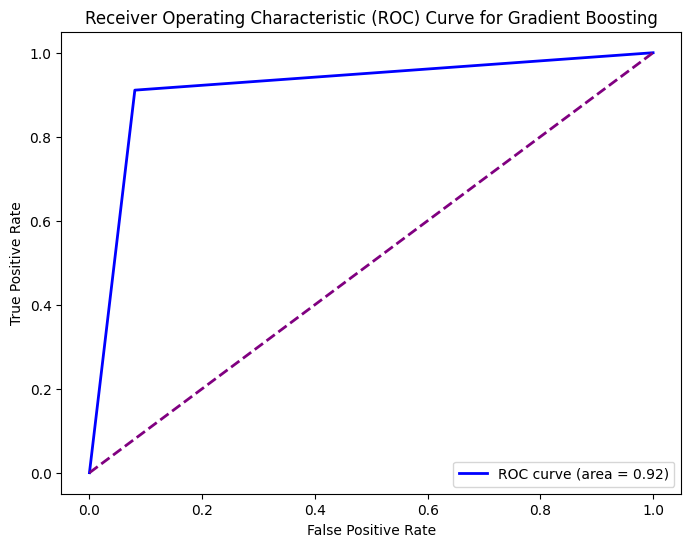

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final_gb)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc='lower right')
plt.show()


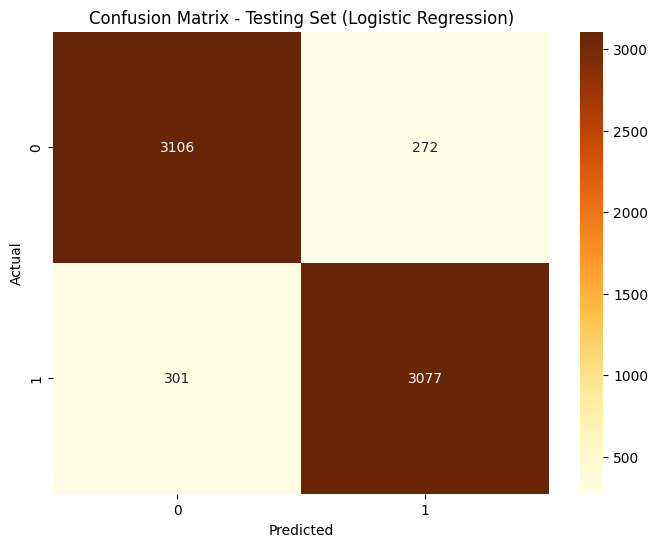

In [45]:
# 1. Predict on the testing set
y_pred_final_gb = gb_model.predict(X_test)

# 2. Compute the confusion matrix
cm_train = confusion_matrix(y_test, y_pred_final_gb)

# 3. Visualize the confusion matrix with a new color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="YlOrBr", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Testing Set (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">3.  Random Forest

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It builds multiple decision trees and combines their outputs to improve predictive accuracy and control overfitting. Unlike a single decision tree, which might overfit to the training data, Random Forest uses multiple trees to make predictions and takes the majority vote (for classification) or average (for regression) of all the trees to give the final output.

The general idea of a decision tree is to split the data into branches based on feature values. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a class label or predicted value. The final Random Forest prediction is made by aggregating the predictions of all individual trees in the forest.

We chose Random Forest because it is robust to overfitting, handles large datasets well, and can handle both categorical and numerical features. Additionally, Random Forest provides feature importance scores, which can help in understanding which features are contributing the most to the model's predictions

In [46]:

# 1. Define hyperparameters to be tested for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],  # Number of trees in the forest
    'max_depth': [3, 5, 10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'bootstrap': [True, False],  # Whether bootstrap samples are used when building trees
    'class_weight': ['balanced', None]  # Handling class imbalance by assigning weights to classes
}

# 2. Initialize the Random Forest model
rf_model = RandomForestClassifier()

# 3. Apply RandomizedSearchCV to optimize hyperparameters
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=30, cv=5, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

# 4. Display the best parameters found through RandomizedSearchCV
print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_

# 5. Use cross_validate with the best model found to get detailed metrics
cv_results = cross_validate(best_model, X_train, y_train, cv=5,
                            scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],
                            return_estimator=True)

# 6. Display the classification report for each fold in cross-validation
for fold, estimator in enumerate(cv_results['estimator']):
    y_pred_fold = estimator.predict(X_train)
    print(f"Classification Report for fold {fold+1}:\n", classification_report(y_train, y_pred_fold))

# 7. Final evaluation on the test set
y_pred_final = best_model.predict(X_test)
print("Classification Report on the test set:\n", classification_report(y_test, y_pred_final))

# 8. Calculate metrics for training
train_metrics2 = {
    'Model': "Random Forest",
    'Data': 'Training',
    'Accuracy': accuracy_score(y_train, y_pred_fold),
    'F1-Score': f1_score(y_train, y_pred_fold, average='weighted'),
    'Precision': precision_score(y_train, y_pred_fold, average='weighted'),
    'Recall': recall_score(y_train, y_pred_fold, average='weighted')
}

# 9. Calculate metrics for test
test_metrics2 = {
    'Model': "Random Forest",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test,y_pred_final, average='weighted'),
    'Precision': precision_score(y_test,y_pred_final, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final, average='weighted')
}

# 10. Convert results into DataFrame
df_metrics2 = pd.DataFrame([train_metrics2, test_metrics2])

# 11. Generate HTML table
html_table = df_metrics2.to_html(index=False, classes="table table-bordered table-striped")

# 12. Display the table in Jupyter Notebook
display(HTML(html_table))


Best parameters found: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': 'balanced', 'bootstrap': False}
Classification Report for fold 1:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.98     13512
         1.0       0.97      1.00      0.98     13512

    accuracy                           0.98     27024
   macro avg       0.98      0.98      0.98     27024
weighted avg       0.98      0.98      0.98     27024

Classification Report for fold 2:
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     13512
         1.0       0.97      0.99      0.98     13512

    accuracy                           0.98     27024
   macro avg       0.98      0.98      0.98     27024
weighted avg       0.98      0.98      0.98     27024

Classification Report for fold 3:
               precision    recall  f1-score   support

         0.0       1.00   

Model,Data,Accuracy,F1-Score,Precision,Recall
Random Forest,Training,0.982608,0.982605,0.982932,0.982608
Random Forest,Test,0.978982,0.978979,0.979212,0.978982


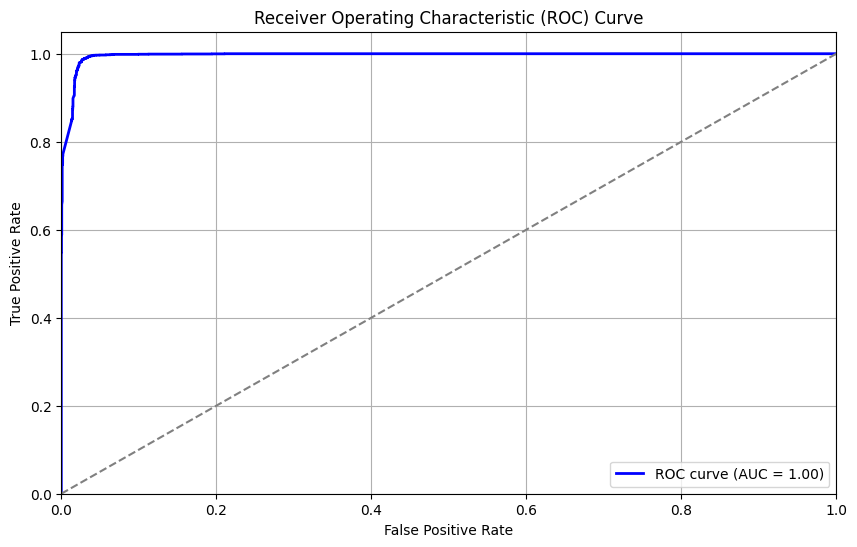

In [47]:
# ============================ ROC and AUC ============================
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

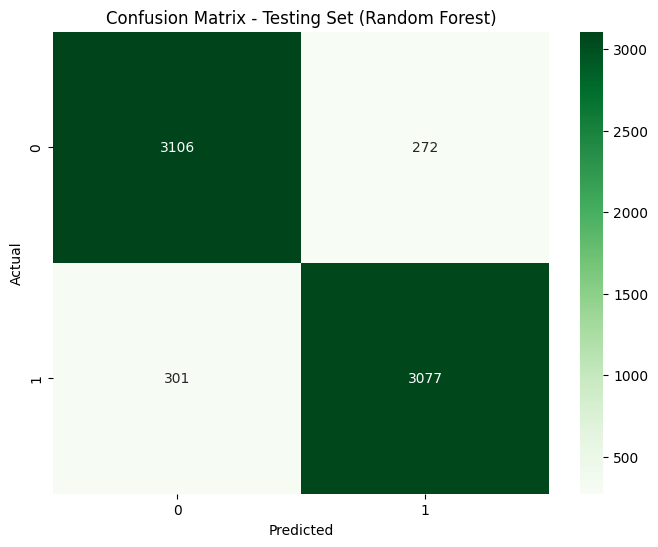

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Predict on the testing set
y_pred_final = best_model.predict(X_test)

# 2. Compute the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_final)

# 3. Visualize the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Greens", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Testing Set (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">4.  XGBOOST

XGBoost (Extreme Gradient Boosting), a highly efficient and flexible supervised learning algorithm based on decision tree ensembles. XGBoost builds an additive model in a forward stage-wise manner, optimizing for a given loss function. Unlike simpler models such as Logistic Regression, XGBoost uses boosting, a technique that combines multiple weak learners to create a strong learner.

In [49]:

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


for col in X_train.select_dtypes(include=['object', 'category']).columns:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col] = X_test[col].astype('category').cat.codes
print("Dimensions des données :")
print(f"X_train_res : {X_train.shape}, y_train_res : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

print("Types de données dans X_train_res :")
print(X_train.dtypes)

if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='f1_weighted',
    random_state=42,
    n_jobs=1,
    error_score='raise'  
)
print("Démarrage de l'entraînement...")
random_search.fit(X_train, y_train)
print("Entraînement terminé !")
print(f"Meilleurs paramètres trouvés : {random_search.best_params_}")
y_pred = random_search.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score sur l'ensemble de test : {f1}")
y_pred_final = best_model.predict(X_test)
print("Classification Report sur le jeu de test :\n")
print(classification_report(y_test, y_pred_final))
test_metrics4 = {
    'Model': "XGBOOST",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test,y_pred_final, average='weighted'),
    'Precision': precision_score(y_test,y_pred_final, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final, average='weighted')
}
df_metrics4 = pd.DataFrame([test_metrics4])
html_table = df_metrics4.to_html(index=False, classes="table table-bordered table-striped")
display(HTML(html_table))


Dimensions des données :
X_train_res : (27024, 514), y_train_res : (27024,)
X_test : (6756, 514), y_test : (6756,)
Types de données dans X_train_res :
required_education               float64
industry                         float64
function                         float64
employment_type_Full-time           bool
employment_type_Not Specified       bool
                                  ...   
writing                          float64
written                          float64
year                             float64
youll                            float64
youre                            float64
Length: 514, dtype: object
Démarrage de l'entraînement...
Entraînement terminé !
Meilleurs paramètres trouvés : {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
F1 Score sur l'ensemble de test : 0.9736479477239907
Classification Report sur le jeu de test :

              precision    recall  f1-score   support

         0.0       0.99      0.

Model,Data,Accuracy,F1-Score,Precision,Recall
XGBOOST,Test,0.978982,0.978979,0.979212,0.978982


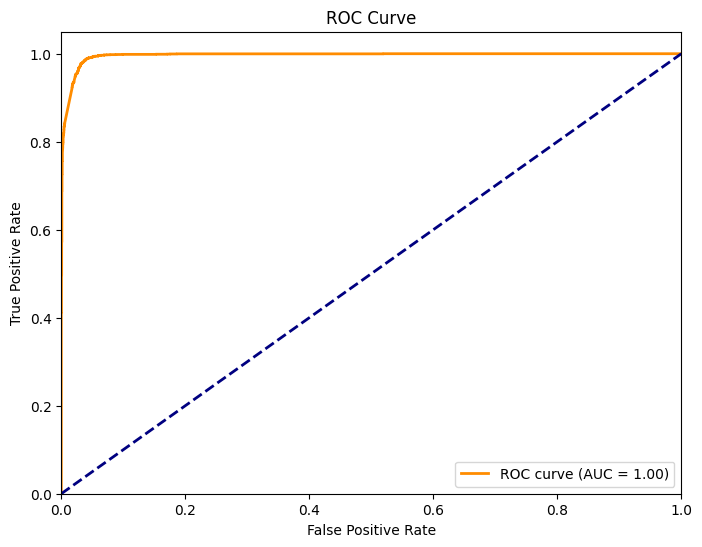

In [50]:
# Compute the ROC curve and AUC
y_pred_prob = random_search.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (class 1)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)  # Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC) to measure model performance

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')  # Plot ROC curve with AUC value
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random classifier (AUC = 0.5)
plt.xlim([0.0, 1.0])  # Set x-axis limits (False Positive Rate from 0 to 1)
plt.ylim([0.0, 1.05])  # Set y-axis limits (True Positive Rate from 0 to slightly above 1)
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.title('ROC Curve')  # Title of the plot
plt.legend(loc='lower right')  # Position of the legend (bottom right)
plt.show()  # Display the plot


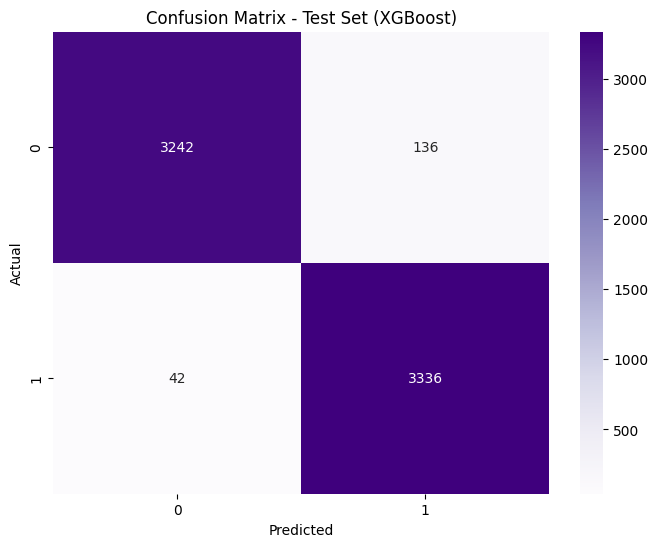

In [51]:
# 1. Predict on the test set
y_pred_test = random_search.best_estimator_.predict(X_test)

# 2. Compute the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# 3. Visualize the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Purples", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Test Set (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">5.  LightGBM

 LightGBM (Light Gradient Boosting Machine), which is a framework for boosting decision trees. Unlike traditional gradient boosting methods, LightGBM uses a histogram-based approach that buckets continuous feature values into discrete bins. This approach significantly speeds up the training process and reduces memory usage.LightGBM works by iteratively building decision trees, where each tree attempts to correct the errors made by the previous ones. It optimizes for a loss function, typically using gradient descent to minimize the error in predictions. One of the key features of LightGBM is its ability to handle categorical features without the need for one-hot encoding.



In [52]:
X_train_opt, X_val, y_train_opt, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

def optimize_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']),
        'verbose': -1  
    }
    
    model = LGBMClassifier(random_state=42, **params)
    model.fit(X_train_opt, y_train_opt)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

print("Optimisation LightGBM en cours...")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(optimize_lightgbm, n_trials=50)
print(f"Meilleurs paramètres pour LightGBM : {study_lgbm.best_params}")
print(f"Meilleur F1-Score pour LightGBM : {study_lgbm.best_value:.4f}")
best_model2 = LGBMClassifier(random_state=42, **study_lgbm.best_params)
best_model2.fit(X_train, y_train)
y_pred_final = best_model2.predict(X_test)
print("Classification Report sur le jeu de test :\n")
print(classification_report(y_test, y_pred_final))
test_metrics5 = {
    'Model': "LIGHTGBM",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test,y_pred_final, average='weighted'),
    'Precision': precision_score(y_test,y_pred_final, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final, average='weighted')
}
df_metrics5 = pd.DataFrame([test_metrics5])
html_table = df_metrics5.to_html(index=False, classes="table table-bordered table-striped")
display(HTML(html_table))

[I 2024-12-24 11:16:15,637] A new study created in memory with name: no-name-37b8b7c1-dee2-4c24-8389-2b22e1076085


Optimisation LightGBM en cours...


[I 2024-12-24 11:16:26,077] Trial 0 finished with value: 0.9794796628801758 and parameters: {'n_estimators': 497, 'learning_rate': 0.16329127366118043, 'num_leaves': 122, 'max_depth': 5, 'subsample': 0.95581286738686, 'colsample_bytree': 0.9591921370939724, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9794796628801758.
[I 2024-12-24 11:16:31,988] Trial 1 finished with value: 0.9702283105022831 and parameters: {'n_estimators': 348, 'learning_rate': 0.13940530840943527, 'num_leaves': 110, 'max_depth': 4, 'subsample': 0.8238367812223316, 'colsample_bytree': 0.9622907428748855, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9794796628801758.
[I 2024-12-24 11:16:47,753] Trial 2 finished with value: 0.960365296803653 and parameters: {'n_estimators': 170, 'learning_rate': 0.012205420829770715, 'num_leaves': 146, 'max_depth': 11, 'subsample': 0.7676148689726228, 'colsample_bytree': 0.903177648452176, 'class_weight': None}. Best is trial 0 with value: 0.979479662880175

Meilleurs paramètres pour LightGBM : {'n_estimators': 500, 'learning_rate': 0.24874734301620313, 'num_leaves': 101, 'max_depth': 10, 'subsample': 0.9274240681528564, 'colsample_bytree': 0.8302390361711122, 'class_weight': 'balanced'}
Meilleur F1-Score pour LightGBM : 0.9850
Classification Report sur le jeu de test :

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      3378
         1.0       0.98      0.99      0.98      3378

    accuracy                           0.98      6756
   macro avg       0.98      0.98      0.98      6756
weighted avg       0.98      0.98      0.98      6756



Model,Data,Accuracy,F1-Score,Precision,Recall
LIGHTGBM,Test,0.98431,0.98431,0.984392,0.98431


In [74]:
X_train_opt = pd.DataFrame(X_train_opt)
columns_used_for_training = X_train_opt.columns.tolist()
joblib.dump(columns_used_for_training, 'columns_used_for_training.pkl')


['columns_used_for_training.pkl']

In [75]:
X_train_opt.info

<bound method DataFrame.info of             0         1         2      3      4      5      6      7      8    \
0       0.07317  0.019623  0.062386  False  False  False  False  False  False   
1      0.047847  0.046854  0.045413  False   True  False  False  False  False   
2      0.073514  0.066257  0.052536   True  False  False  False  False  False   
3      0.047847  0.046854  0.045413  False   True  False  False  False  False   
4      0.047847  0.401487  0.080414   True  False  False  False  False  False   
...         ...       ...       ...    ...    ...    ...    ...    ...    ...   
21614  0.047847  0.019162  0.045413   True  False  False  False  False  False   
21615  0.047847  0.046854  0.045413   True  False  False  False  False  False   
21616  0.047847  0.046854  0.045413  False  False  False   True  False  False   
21617  0.047847  0.003776  0.084977   True  False  False  False  False  False   
21618  0.047847  0.401487  0.084977   True  False  False  False  False  False

In [71]:
X_train_opt.shape

(21619, 514)

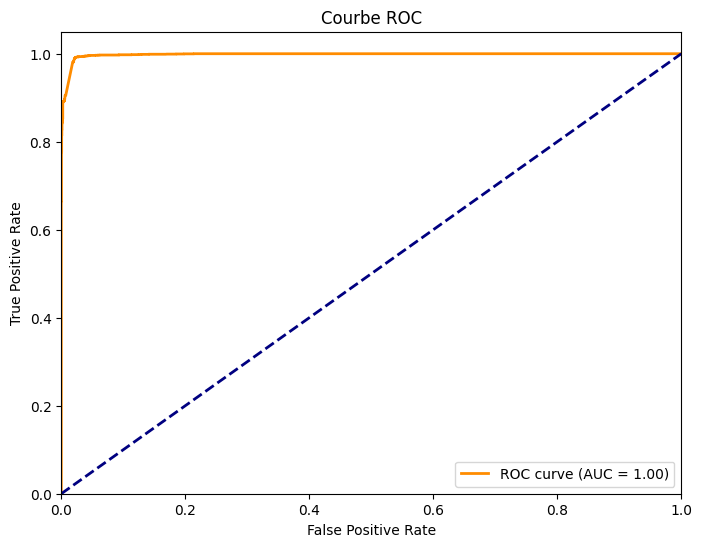

AUC : 1.00


In [53]:
y_pred_prob = best_model2.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
print(f"AUC : {roc_auc:.2f}")

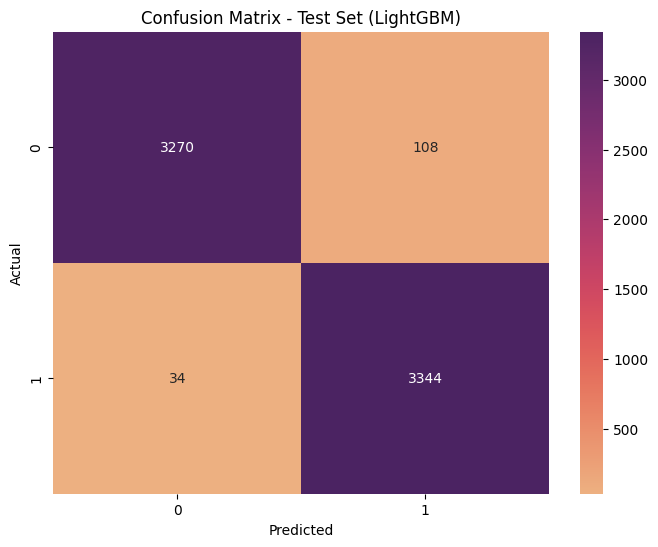

In [54]:

# 1. Predict on the test set
y_pred_test = best_model.predict(X_test)

# 2. Compute the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)

# 3. Visualize the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="flare", xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix - Test Set (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<b><p style="font-family:'OccamSeraser', Arial, sans-serif; color:black; font-size:120%; text-align:left;">6.  Decision Tree

he Decision Tree, a model that partitions the feature space into distinct regions based on decision rules. It is a non-linear model that recursively splits the data into subsets based on the feature values, aiming to maximize the homogeneity of the target variable within each subset.A Decision Tree splits the data at each node based on a feature that minimizes a specific criterion (such as Gini impurity or entropy for classification problems). The decision at each node is made using the feature that results in the best separation, effectively creating a hierarchical structure where the leaves represent the predicted classes.We chose this model because it is interpretable, meaning that it is easy to understand and visualize how the model makes decisions. The tree structure provides insight into which features are most important for making predictions. Additionally, Decision Trees are computationally efficient and can handle both categorical and numerical data, making them versatile for various types of datasets.By leveraging the decision-making process of the tree, we can model complex relationships between features while maintaining transparency. This allows us to understand and trust the model's decisions, especially in high-stakes applications where interpretability is crucial.

In [55]:
# 1. Hyperparameter reduction to speed up the search
param_dist = {
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree to prevent overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split (Gini impurity or Information Gain)
    'class_weight': ['balanced']  # Adjust weights to balance class distribution (important for imbalanced datasets)
}

# 2. Decision Tree model initialization
dt_model = DecisionTreeClassifier(random_state=42)
# 3. Hyperparameter search using RandomizedSearchCV for faster validation
random_search = RandomizedSearchCV(
    dt_model, param_distributions=param_dist, n_iter=10, cv=3,  # Perform 10 iterations of random search with 3-fold cross-validation
    scoring='f1_weighted',  # The metric to optimize is weighted F1 score
    random_state=42
)
random_search.fit(X_train, y_train)

# 4. Print the best hyperparameters found from RandomizedSearchCV
print(f"Best parameters found: {random_search.best_params_}")
best_model = random_search.best_estimator_
# 5. Print classificat
cv_results = cross_validate(
    best_model, X_train, y_train, cv=5,  # Perform 5-fold cross-validation
    scoring=['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted'],  # Metrics to evaluate the model
    return_estimator=True)  # Rion report for each fold
for fold, estimator in enumerate(cv_results['estimator']):
    y_pred_fold = estimator.predict(X_train)  # Predict using the model from each fold
    print(f"Classification Report for fold {fold+1} :\n", classification_report(y_train, y_pred_fold))

# 6. Final evaluation on the test set
y_pred_final = best_model.predict(X_test)  # Final prediction using the best model
print("Classification Report on the test set:\n", classification_report(y_test, y_pred_final))  # Print classification report

# 7. Calculate metrics for test
test_metrics6 = {
    'Model': "Decision Tree",
    'Data': 'Test',
    'Accuracy': accuracy_score(y_test, y_pred_final),
    'F1-Score': f1_score(y_test,y_pred_final, average='weighted'),
    'Precision': precision_score(y_test,y_pred_final, average='weighted'),
    'Recall': recall_score(y_test, y_pred_final, average='weighted')
}

# 8. Convert results into DataFrame
df_metrics6 = pd.DataFrame([test_metrics6])

# 9. Generate HTML table
html_table = df_metrics6.to_html(index=False, classes="table table-bordered table-striped")

# 10. Display the table in Jupyter Notebook
display(HTML(html_table))

Best parameters found: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced'}
Classification Report for fold 1 :
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     13512
         1.0       0.97      0.99      0.98     13512

    accuracy                           0.98     27024
   macro avg       0.98      0.98      0.98     27024
weighted avg       0.98      0.98      0.98     27024

Classification Report for fold 2 :
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     13512
         1.0       0.97      0.99      0.98     13512

    accuracy                           0.98     27024
   macro avg       0.98      0.98      0.98     27024
weighted avg       0.98      0.98      0.98     27024

Classification Report for fold 3 :
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98

Model,Data,Accuracy,F1-Score,Precision,Recall
Decision Tree,Test,0.94701,0.946968,0.948429,0.94701


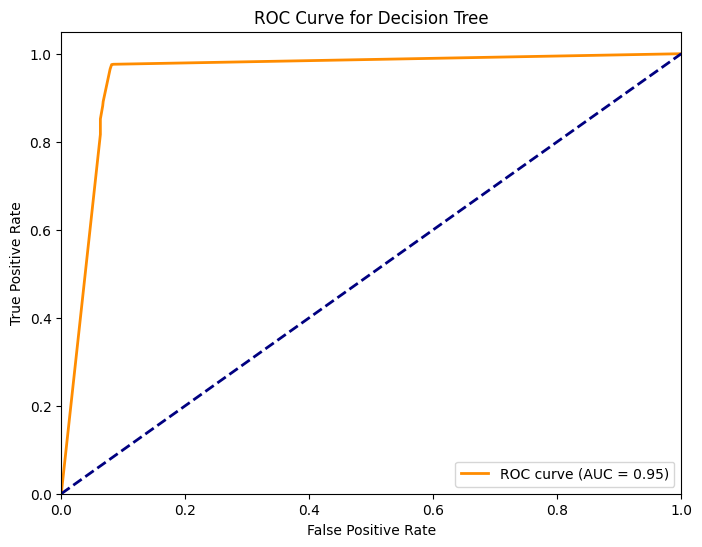

AUC (Area Under the Curve) for Decision Tree: 0.95


In [56]:

# 1. Predict probabilities for the positive class
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# 3. Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# 4. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

# 5. Print AUC score
print(f"AUC (Area Under the Curve) for Decision Tree: {roc_auc:.2f}")


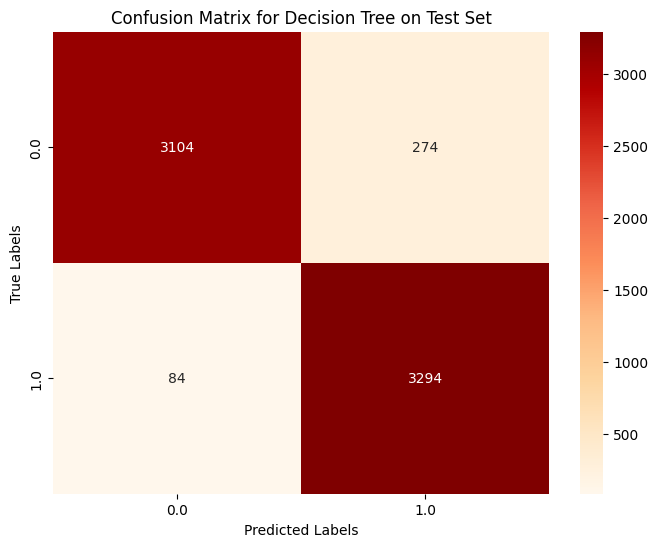

In [57]:
# 1. Predict on the test set
y_pred_final = best_model.predict(X_test)

# 2. Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# 3. Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='OrRd', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree on Test Set')
plt.show()

<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;">V. Test Metrics Comparison for Multiple Models 🔍


In [58]:
# Combine all the model metrics into a list
all_metrics = [test_metrics0,test_metrics1, test_metrics2,test_metrics4,test_metrics5,test_metrics6]

# Convert the list of dictionaries into a DataFrame
df_metrics = pd.DataFrame(all_metrics)

# Generate the HTML table for display in Jupyter Notebook
html_table = df_metrics.to_html(index=False, classes="table table-bordered table-striped")

# Display the table in Jupyter Notebook
display(HTML(html_table))

Model,Data,Accuracy,F1-Score,Precision,Recall
Multinomial Naive Bayes,Test,0.835702,0.835402,0.838160,0.835702
Logistic Regression,Test,0.915187,0.915185,0.915217,0.915187
Random Forest,Test,0.978982,0.978979,0.979212,0.978982
XGBOOST,Test,0.978982,0.978979,0.979212,0.978982
LIGHTGBM,Test,0.984310,0.984310,0.984392,0.984310
Decision Tree,Test,0.947010,0.946968,0.948429,0.947010


<img src="Images/ACCU.png" style="display: block;">

<img src="Images/F1.png" style="display: block;">

<img src="Images/prec.png" style="display: block;">

<img src="Images/RECALL.png" style="display: block;">

<p style="font-family:Bebas Neue; color:black; font-size:120%; text-align:left;">In this study, various machine learning models were evaluated to detect fraudulent job postings. The models tested include <b>Multinomial Naive Bayes,Logistic Regression, Random Forest, XGBoost, LightGBM, and Decision Tree</b>. Each model was assessed based on accuracy, precision, recall, and F1-score. The results revealed that <b>LightGBM</b> outperformed all other models, achieving the highest accuracy of 98.34% along with a strong precision and recall of 98.35% and 98.34%, respectively. The Random Forest and XGBoost models also performed well, with similar performance metrics, but LightGBM proved to be the most effective in classifying job postings as legitimate or fraudulent. These findings suggest that LightGBM is the best-suited model for this task.</p>


<b><p style="font-family:'Times', Arial, sans-serif; color:#4169E1; font-size:180%; text-align:left;">VI. Deployment of the LightGBM Model


<p style="font-family:Bebas Neue; color:black; font-size:120%; text-align:left;">After identifying LightGBM as the most effective model for detecting fraudulent job postings, the next step involves transitioning it into a deployable solution. This section focuses on preparing the model for real-world application . The deployment process ensures that the model's predictions are accessible, allowing users to input new data and receive accurate classifications instantly. By transforming the analysis into a practical tool, this deployment bridges the gap between research insights and operational impact.

In [120]:
# Save the trained LightGBM model
joblib.dump(best_model2, 'lightgbm_best_model.pkl')
print("LightGBM model saved as 'lightgbm_best_model.pkl'.")


LightGBM model saved as 'lightgbm_best_model.pkl'.
